In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 14

# Prepare the dataset

In [2]:
menu = pd.read_csv('./menu.csv')
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


## Remove irrelevant columns

### Items

In [3]:
items = menu['Item']

### Category

In [4]:
categories = menu['Category']
menu['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

### Daily values (%)

In [5]:
corr_matrix = menu.corr()

In [6]:
corr_matrix['Total Fat']['Total Fat (% Daily Value)']

0.9997647393950055

### Removing

In [7]:
irrelevant_columns = ['Item', 'Category']

cols = menu.columns
for col in cols:
    if col + ' (% Daily Value)' in cols:
        irrelevant_columns += [col + ' (% Daily Value)']
        
clean_menu_1 = menu.drop(irrelevant_columns, axis=1)
clean_menu_1.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


### Correlated columns

In [8]:
corr_matrix = clean_menu_1.corr()
corr_matrix

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.845564,0.522441,0.596399,0.712309,0.781539,0.538894,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.847008,0.433686,0.682161,0.846624,0.461672,0.581274,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.846707,0.431453,0.680547,0.846158,0.461213,0.580837,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Saturated Fat,0.845564,0.847008,0.846707,1.000000,0.620611,0.631210,0.584075,0.591261,0.351818,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Trans Fat,0.522441,0.433686,0.431453,0.620611,1.000000,0.253935,0.187580,0.463250,0.054918,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.631210,0.253935,1.000000,0.624362,0.270977,0.435575,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Sodium,0.712309,0.846624,0.846158,0.584075,0.187580,0.624362,1.000000,0.200796,0.694389,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593
Carbohydrates,0.781539,0.461672,0.461213,0.591261,0.463250,0.270977,0.200796,1.000000,0.224577,0.762362,0.352122,0.083802,-0.034724,0.589699,0.210241
Dietary Fiber,0.538894,0.581274,0.580837,0.351818,0.054918,0.435575,0.694389,0.224577,1.000000,-0.295178,0.641345,0.340518,0.141935,0.028711,0.740411
Sugars,0.259598,-0.115285,-0.115446,0.197734,0.334756,-0.135518,-0.426536,0.762362,-0.295178,1.000000,-0.179940,0.048488,-0.069847,0.600093,-0.364767


In [9]:
irrelevant_columns = ['Calories from Fat']
        
clean_menu = clean_menu_1.drop(irrelevant_columns, axis=1)
clean_menu.head()

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8 oz (136 g),300,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,4.8 oz (135 g),250,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,3.9 oz (111 g),370,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,5.7 oz (161 g),450,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,5.7 oz (161 g),400,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [10]:
menu = clean_menu

## Format data types

### Serving size

In [11]:
print(menu['Serving Size'].to_string())

0         4.8 oz (136 g)
1         4.8 oz (135 g)
2         3.9 oz (111 g)
3         5.7 oz (161 g)
4         5.7 oz (161 g)
5         6.5 oz (185 g)
6         5.3 oz (150 g)
7         5.8 oz (164 g)
8         5.4 oz (153 g)
9         5.9 oz (167 g)
10        4.1 oz (117 g)
11        4.6 oz (131 g)
12        5.7 oz (163 g)
13        6.2 oz (177 g)
14        5.9 oz (167 g)
15        6.4 oz (181 g)
16          5 oz (143 g)
17        5.5 oz (157 g)
18        7.1 oz (201 g)
19        6.1 oz (174 g)
20        6.3 oz (178 g)
21          5 oz (141 g)
22        7.1 oz (201 g)
23        7.2 oz (205 g)
24        6.9 oz (197 g)
25        7.1 oz (201 g)
26        8.5 oz (241 g)
27        9.5 oz (269 g)
28         10 oz (283 g)
29        9.6 oz (272 g)
30       10.1 oz (286 g)
31       14.8 oz (420 g)
32       15.3 oz (434 g)
33       14.9 oz (423 g)
34       15.4 oz (437 g)
35        5.3 oz (151 g)
36        6.8 oz (192 g)
37        3.9 oz (111 g)
38           2 oz (56 g)
39          4 oz (114 g)


In [12]:
print(items[130])
print(items[131])

1% Low Fat Milk Jug
Fat Free Chocolate Milk Jug


In [13]:
def weight_from_serving_size(size):  # [g]
    # example: '4.8 oz (136 g)'
    if size[-2] == 'g':  
        return float(size.split('(')[1].split(' ')[0])
    
    # 1 fl oz = 29.57 g, examples: '12 fl oz cup' or '16.9 fl oz' 
    if size[-5:] == 'fl oz' or size[-9:] == 'fl oz cup':
        return float(size.split(' ')[0]) * 29.57
    
    size = size.split(' ', 1)
    
    # example: 6 fl oz (177 ml)
    if size[1][:5] == 'fl oz':
        return float(size[0]) * 29.57
    
    # assume 1 ml of milk = 1.04 g, example: 1 carton (236 ml)
    return float(size[1].split('(')[1].split(' ')[0]) * 1.04
    

print('4.8 oz (136 g):    ', weight_from_serving_size('4.8 oz (136 g)', ))
print('12 fl oz cup:      ', weight_from_serving_size('12 fl oz cup'))
print('16.9 fl oz:        ', weight_from_serving_size('16.9 fl oz'))
print('6 fl oz (177 ml):  ', weight_from_serving_size('6 fl oz (177 ml)'))
print('1 carton (236 ml): ', weight_from_serving_size('1 carton (236 ml)'))

4.8 oz (136 g):     136.0
12 fl oz cup:       354.84000000000003
16.9 fl oz:         499.73299999999995
6 fl oz (177 ml):   177.42000000000002
1 carton (236 ml):  245.44


In [14]:
menu.head()

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8 oz (136 g),300,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,4.8 oz (135 g),250,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,3.9 oz (111 g),370,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,5.7 oz (161 g),450,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,5.7 oz (161 g),400,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [15]:
formatted_menu_1 = menu.copy()
formatted_menu_1['Serving Size'] = menu['Serving Size'].apply(weight_from_serving_size)
formatted_menu_1.head()

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,136.0,300,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,135.0,250,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,111.0,370,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,161.0,450,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,161.0,400,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


### int to float

In [16]:
formatted_menu = formatted_menu_1.astype(float)
formatted_menu.dtypes

Serving Size                 float64
Calories                     float64
Total Fat                    float64
Saturated Fat                float64
Trans Fat                    float64
Cholesterol                  float64
Sodium                       float64
Carbohydrates                float64
Dietary Fiber                float64
Sugars                       float64
Protein                      float64
Vitamin A (% Daily Value)    float64
Vitamin C (% Daily Value)    float64
Calcium (% Daily Value)      float64
Iron (% Daily Value)         float64
dtype: object

## Center the data

In [17]:
formatted_menu.describe()

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,376.200935,368.269231,14.165385,6.007692,0.203846,54.942308,495.750000,47.346154,1.630769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,208.929478,240.269886,14.205998,5.321873,0.429133,87.269257,577.026323,28.252232,1.567717,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.250000,210.000000,2.375000,1.000000,0.000000,5.000000,107.500000,30.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,354.840000,340.000000,11.000000,5.000000,0.000000,35.000000,190.000000,44.000000,1.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,473.120000,500.000000,22.250000,10.000000,0.000000,65.000000,865.000000,60.000000,3.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,946.240000,1880.000000,118.000000,20.000000,2.500000,575.000000,3600.000000,141.000000,7.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

centered_menu = scaler.fit_transform(formatted_menu)
centered_menu = pd.DataFrame(centered_menu, columns=formatted_menu.columns)
centered_menu.round(2).describe()

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,-0.000500,-0.000269,0.000192,0.000654,-0.003038,0.000423,0.000346,-0.000077,0.002577,-0.000231,0.000115,-0.000192,0.003385,0.000769,-0.001269
std,1.001417,1.001996,1.001752,1.001399,1.003965,1.001606,1.001980,1.002331,1.001009,1.001519,1.001882,1.002200,1.001325,1.001625,1.002350
min,-1.670000,-1.540000,-1.000000,-1.130000,-0.480000,-0.630000,-0.860000,-1.680000,-1.040000,-1.030000,-1.170000,-0.550000,-0.320000,-1.230000,-0.890000
25%,-0.845000,-0.660000,-0.830000,-0.940000,-0.480000,-0.570000,-0.675000,-0.620000,-1.040000,-0.827500,-0.820000,-0.470000,-0.320000,-0.880000,-0.890000
50%,-0.100000,-0.120000,-0.220000,-0.190000,-0.480000,-0.230000,-0.530000,-0.120000,-0.400000,-0.415000,-0.120000,-0.220000,-0.320000,-0.060000,-0.430000
75%,0.460000,0.550000,0.567500,0.750000,-0.480000,0.120000,0.640000,0.450000,0.880000,0.650000,0.500000,0.060000,-0.170000,0.530000,0.830000
max,2.730000,6.300000,7.320000,2.630000,5.360000,5.970000,5.390000,3.320000,3.430000,3.440000,6.460000,6.440000,8.800000,2.890000,3.710000


In [19]:
X = centered_menu

# Clustering

## Metric

In [20]:
import sklearn.metrics

# metric = sklearn.metrics.davies_bouldin_score
# metric_name = 'davies_bouldin_score'

metric = sklearn.metrics.calinski_harabasz_score
metric_name = 'calinski_harabasz_score'

# metric = sklearn.metrics.silhouette_score
# metric_name = 'silhouette_score'

## K-means - centers generation methods

In [21]:
from sklearn.cluster import KMeans

n_clusters = 6
n_tests = 25
max_iter = 25

In [22]:
def total_random(X, n_clusters, random_state):
    col_min = np.amin(X, axis=0)
    col_max = np.amax(X, axis=0)
    n_cols = X.shape[1]
    return random_state.uniform(low=col_min, high=col_max, size=(n_clusters, n_cols))


init_arr = ['k-means++', 'random', total_random]
init_names = ['k-means++', 'scikit-learn random', 'total random']

In [23]:
def score_each_iteration(init, random_state=None):
    if random_state is None:
        random_state = np.random.randint(10000)
        
    scores = []
    for i in range(1, max_iter + 1):
        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=1, max_iter=i, random_state=random_state)
        kmeans.fit_predict(X)
        scores += [metric(X, kmeans.labels_)]
        
    return np.array(scores)


def test_n_times(init, random_states=None):
    if random_states is None:
        random_states = np.random.randint(10000, size=(n_tests))
        
    all_scores = []
    for i in range(n_tests):
        all_scores += [score_each_iteration(init, random_state=random_states[i])]
        
    all_scores = np.array(all_scores)
    mean = np.mean(all_scores, axis=0)
    std = np.std(all_scores, axis=0)
    return mean, std

    
def test_init_methods():
    means, stds = [], []
    for init in init_arr:
        mean, std = test_n_times(init)
        means += [mean]
        stds += [std]
        
    return means, stds

In [24]:
means, stds = test_init_methods()

In [25]:
def plot_multi_with_errors(x, Y, YERR, labels, title, xlabel, ylabel, save_dir):
    for y, yerr, label in zip(Y, YERR, labels):
        plt.errorbar(x, y, yerr=yerr, marker='.', capsize=7, capthick=2, elinewidth=1, label=label)
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(np.arange(np.amin(x), np.amax(x) + 1, 2))
    
    plt.savefig(save_dir + title + '.jpg') 
    plt.show()

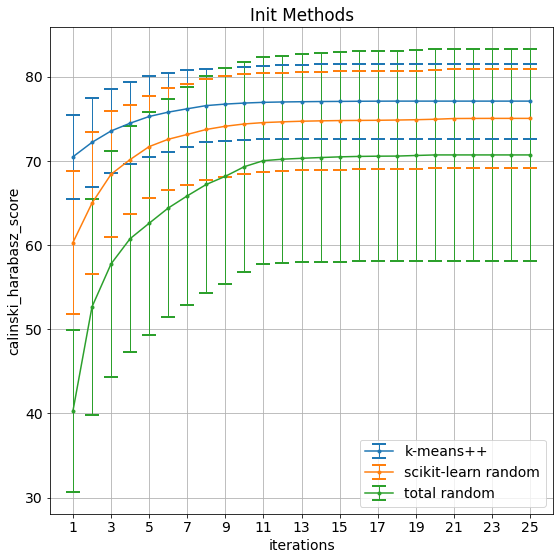

In [26]:
plot_multi_with_errors(np.arange(1, max_iter + 1), means, stds, init_names, 'Init Methods', 'iterations',
                       metric_name, './plots/')

## Find an optimal k

In [32]:
n_clusters_arr = np.arange(2, 25)
n_tests = 50
max_iter = 200

random_states = np.random.randint(10000, size=(n_tests))

In [33]:
def test_n_clusters(n_clusters, random_state, init='k-means++'):
    scores = []
    for _ in range(n_tests):
        kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=1, max_iter=max_iter)
        kmeans.fit_predict(X)
        scores += [metric(X, kmeans.labels_)]
    
    scores = np.array(scores)
    return np.mean(scores), np.std(scores)

def test_n_clusters_arr(n_clusters_arr, random_states, init='k-means++'):
    means, stds = [], []
    for n_clusters, random_state in zip(n_clusters_arr, random_states):
        mean, std = test_n_clusters(n_clusters, random_state)
        means += [mean]
        stds += [std]
        
    return means, stds

In [34]:
means, stds = test_n_clusters_arr(n_clusters_arr, random_states)

In [35]:
def plot_with_errors(x, y, yerr, title, xlabel, ylabel, save_dir):
    plt.errorbar(x, y, yerr=yerr, capsize=5)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(np.arange(np.amin(x), np.amax(x) + 1, 2))
    
    plt.savefig(save_dir + title + '.jpg') 
    plt.show()

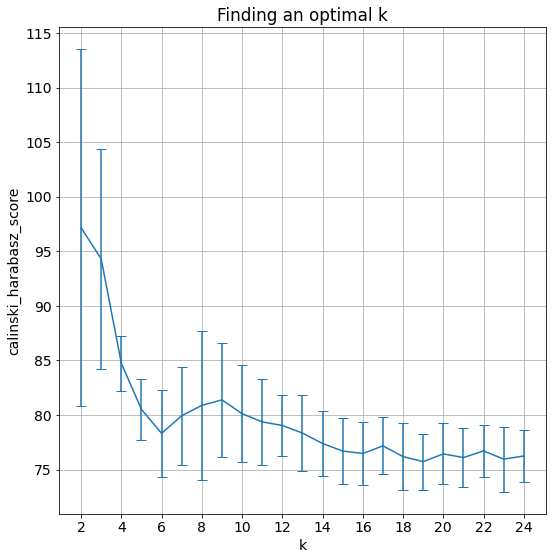

In [36]:
plot_with_errors(n_clusters_arr, means, stds, 'Finding an optimal k', 'k', metric_name, './plots/')

## Visualisation

In [37]:
init = 'k-means++'
n_clusters = 9

In [38]:
kmeans = KMeans(n_clusters=n_clusters, init=total_random, n_init=100, max_iter=max_iter)
kmeans.fit_predict(X)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
cluster_pca_data = pca.transform(cluster_centers)

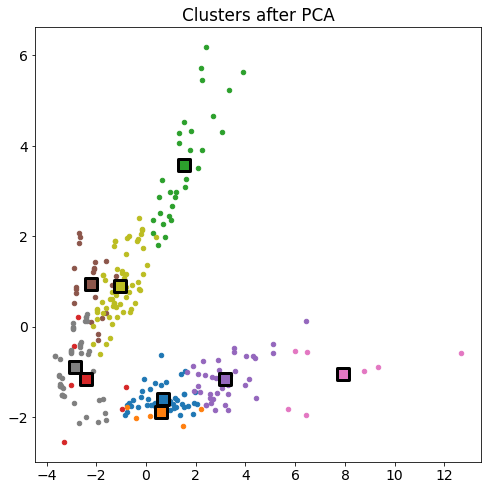

In [40]:
ax = plt.gca()
colors = []
for label in range(n_clusters):
    label_data = pca_data[labels == label]
    color = next(ax._get_lines.prop_cycler)['color']
    colors += [color]
    plt.scatter(label_data[:, 0], label_data[:, 1], color=color, s=20)

for label in range(n_clusters):
    color = colors[label]
    plt.scatter(cluster_pca_data[label, 0], cluster_pca_data[label, 1], color=color, marker='s', s=150, 
                edgecolor='k', linewidth=3)

plt.title('Clusters after PCA')
plt.savefig('./plots/clusters_pca.jpg')
plt.show()

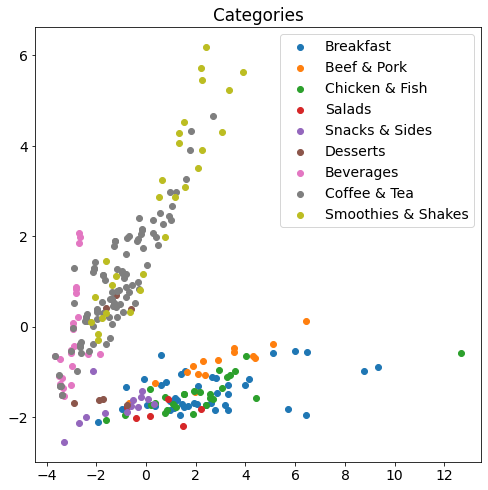

In [41]:
for category in categories.unique():
    category_data = pca_data[categories == category]
    plt.scatter(category_data[:, 0], category_data[:, 1], label=category)
    
plt.title('Categories')
plt.legend()
plt.savefig('./plots/categories.jpg')
plt.show()

### Outlier on the right side

In [37]:
idx = np.argmax(pca_data[:, 0])
print(pca_data[idx])
print(categories[idx])
print(items[idx])

[12.6633312  -0.57602185]
Chicken & Fish
Chicken McNuggets (40 piece)
